In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

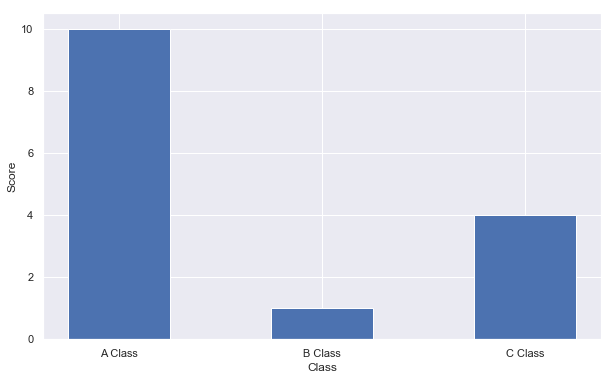

In [2]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

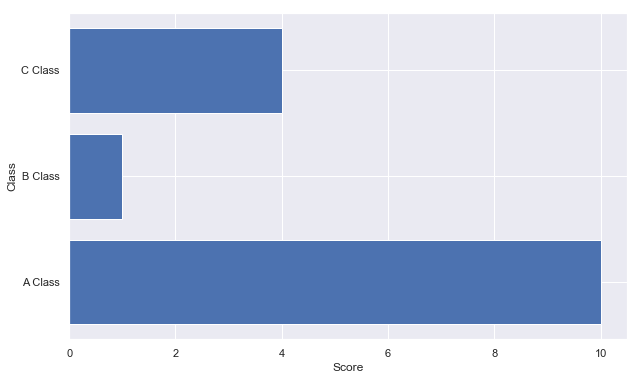

In [3]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

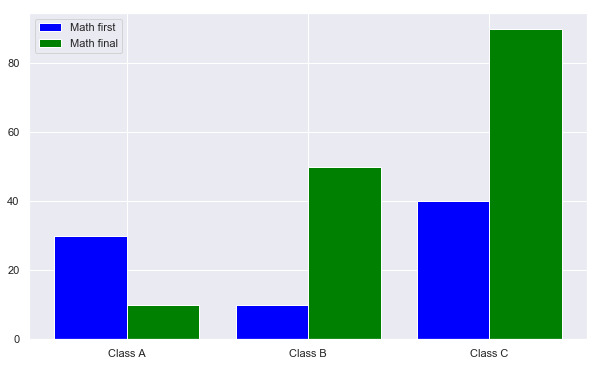

In [4]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

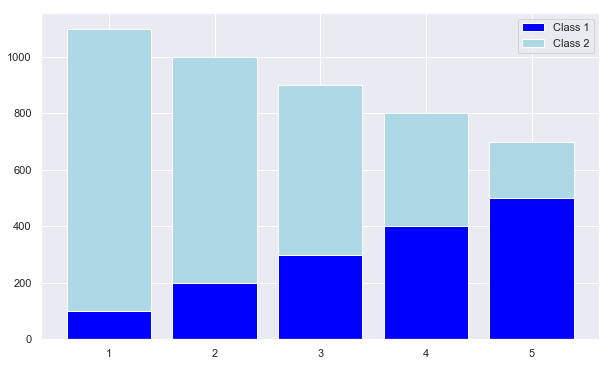

In [5]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X軸
x = np.array([1, 2, 3, 4, 5]) 

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

In [6]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

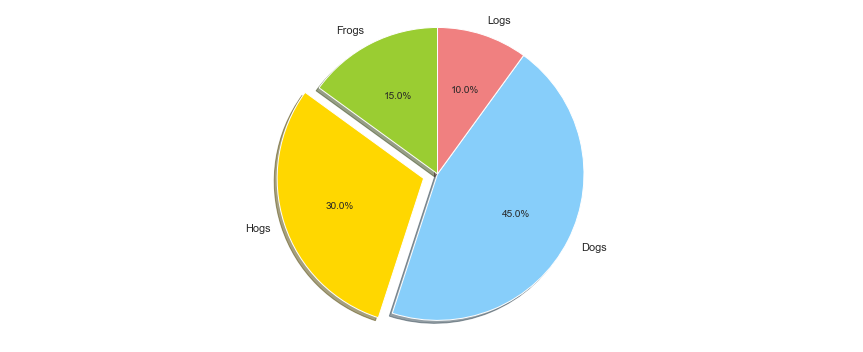

In [7]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

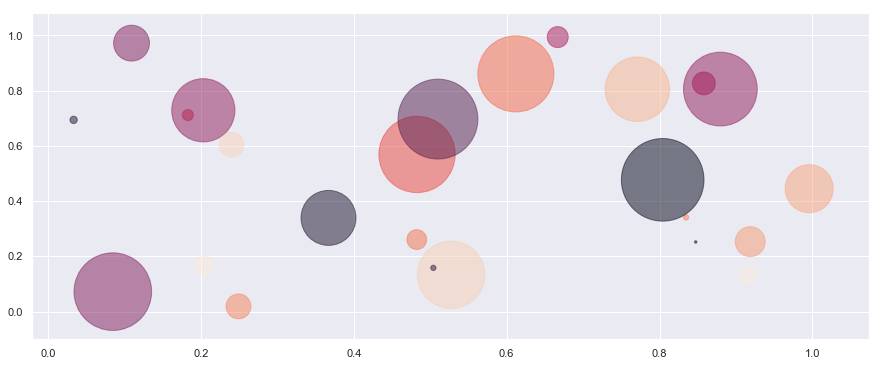

In [8]:
N = 25

# X,Yデータをランダムに生成 
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる 
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

In [9]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep = ';')

In [10]:
grouped_student_math_data1 = student_data_math.groupby(['reason'])

In [11]:
graphdata = grouped_student_math_data1.size()
graphdata

reason
course        145
home          109
other          36
reputation    105
dtype: int64

(-1.1193776980870564,
 1.1102745524399802,
 -1.1043131643562698,
 1.1002054024801953)

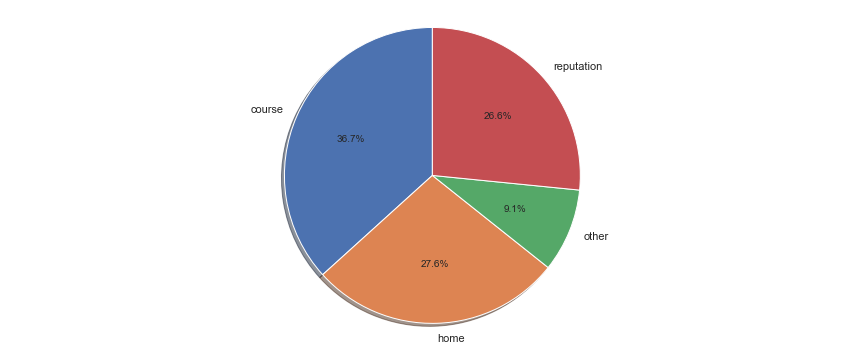

In [12]:


# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(graphdata, labels = ['course', 'home', 'other', 'reputation'],
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.ylabel('')
# 円を丸く描画
plt.axis('equal')

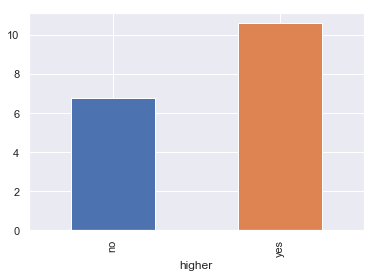

In [13]:
grouped_student_math_data2 = student_data_math.groupby(['higher'])['G3'].mean().plot(kind='bar')
grouped_student_math_data2

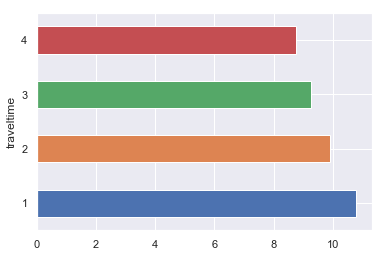

In [14]:
grouped_student_math_data3 = student_data_math.groupby(['traveltime'])['G3'].mean().plot(kind='barh')
grouped_student_math_data2

In [15]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１か−１を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * … と和が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング。
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする。
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

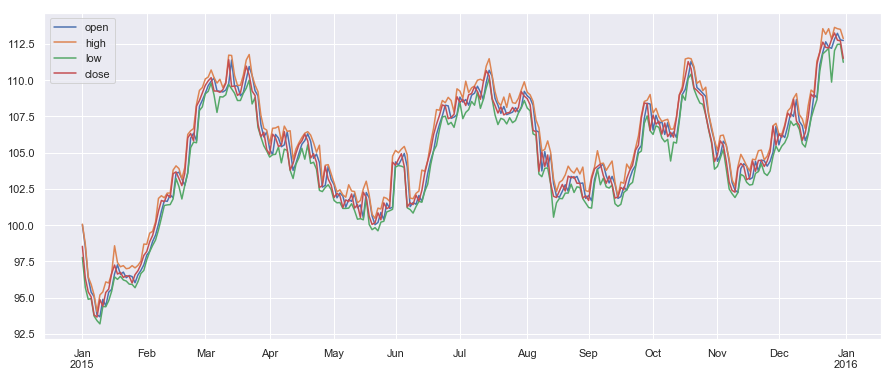

In [16]:
df.plot(figsize = (15,6), legend = 'best', grid = True)

In [17]:
# plotly モジュールのインポート
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=True) 

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
iplot(fig)

In [18]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [19]:
dow_jones = pd.read_csv('dow_jones_index.data')
dow_jones.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [20]:
dow_jones['open'] = pd.to_numeric(dow_jones['open'].str.strip('$'))
dow_jones['high'] = pd.to_numeric(dow_jones['high'].str.strip('$'))
dow_jones['low'] = pd.to_numeric(dow_jones['low'].str.strip('$'))
dow_jones['close'] = pd.to_numeric(dow_jones['close'].str.strip('$'))
dow_jones['next_weeks_open'] = pd.to_numeric(dow_jones['next_weeks_open'].str.strip('$'))
dow_jones['next_weeks_close'] = pd.to_numeric(dow_jones['next_weeks_close'].str.strip('$'))

In [21]:
dow_jones.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [22]:
type(dow_jones['date'][0])

str

In [23]:
dow_jones['date'] = pd.to_datetime(dow_jones['date'])
dow_jones.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [24]:
dow_jones_index_stuck_index = dow_jones.set_index(['date','stock'])
dow_jones_index_stuck_index.head()

,,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,stock,,,,,,,,,,,,,,
2011-01-07,AA,1,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
2011-01-14,AA,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2011-01-21,AA,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
2011-01-28,AA,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
2011-02-04,AA,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [25]:
dow_jones_index_stuck_index_unstack = dow_jones_index_stuck_index.unstack()

In [26]:
dow_close_data = dow_jones_index_stuck_index_unstack['close']

In [27]:
dow_close_data.describe()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,16.504400,46.712400,73.448000,13.051600,103.152000,17.899200,101.175600,52.873600,41.249600,19.784000,...,34.360400,25.920800,19.821600,64.002000,29.626800,59.160000,84.033200,36.46960,53.912800,82.111600
std,0.772922,2.396248,3.087631,1.417382,6.218651,1.984095,5.267066,2.367048,1.882473,0.912022,...,1.666357,1.416407,0.915085,1.828795,1.369257,2.649218,2.985547,0.93282,1.555639,3.137743
min,14.720000,43.530000,69.100000,10.520000,92.750000,14.930000,91.190000,48.350000,37.580000,17.970000,...,31.910000,23.700000,18.150000,60.600000,27.490000,53.330000,79.080000,34.95000,51.520000,75.590000
25%,16.030000,44.360000,71.640000,11.930000,99.590000,16.880000,97.900000,50.290000,39.450000,19.250000,...,33.060000,24.800000,19.190000,62.590000,28.430000,57.920000,82.520000,35.84000,52.540000,79.780000
50%,16.520000,46.250000,72.690000,13.370000,103.540000,17.520000,102.100000,52.910000,41.520000,19.950000,...,34.040000,25.680000,20.110000,64.300000,30.340000,59.210000,83.520000,36.31000,53.660000,82.630000
75%,17.100000,48.500000,74.840000,14.250000,107.210000,18.700000,103.750000,54.630000,42.950000,20.360000,...,35.820000,27.060000,20.530000,65.270000,30.710000,61.180000,85.320000,37.26000,55.290000,84.500000
max,17.920000,51.190000,79.780000,15.250000,115.410000,22.050000,109.660000,56.790000,43.560000,21.440000,...,37.350000,28.600000,20.970000,67.360000,31.410000,63.430000,89.580000,38.47000,56.700000,87.980000


In [28]:
corr_data = dow_close_data.corr()

In [29]:
corr_data

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
stock,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,-0.132094,0.291520,0.432240,0.695727,0.277191,0.470529,0.762246,0.772470,0.740139,...,-0.194258,0.317951,0.111613,-0.162919,0.030825,0.405575,0.407474,0.728472,0.171045,0.685739
AXP,-0.132094,1.000000,0.792575,-0.746595,0.255515,-0.593743,0.236456,0.004094,-0.129064,-0.315425,...,0.767470,-0.561235,0.663768,0.670814,0.853905,0.589784,0.688131,0.239228,0.261840,-0.036042
BA,0.291520,0.792575,1.000000,-0.536545,0.627205,-0.465162,0.568946,0.417249,0.350917,0.139263,...,0.591316,-0.441828,0.729025,0.482806,0.802601,0.863653,0.916338,0.566156,0.224755,0.444624
BAC,0.432240,-0.746595,-0.536545,1.000000,-0.131058,0.813696,-0.295246,0.129762,0.421660,0.568918,...,-0.604937,0.817784,-0.695282,-0.311218,-0.786890,-0.418905,-0.508228,-0.089458,0.131447,0.123588
CAT,0.695727,0.255515,0.627205,-0.131058,1.000000,-0.375140,0.889416,0.902856,0.712870,0.463054,...,-0.030892,-0.325324,0.666647,-0.226021,0.482533,0.778439,0.734655,0.890315,-0.170677,0.803195
CSCO,0.277191,-0.593743,-0.465162,0.813696,-0.375140,1.000000,-0.548609,-0.175626,0.067161,0.362102,...,-0.286511,0.953722,-0.784896,0.036368,-0.704006,-0.549185,-0.496793,-0.228347,0.501898,-0.120732
CVX,0.470529,0.236456,0.568946,-0.295246,0.889416,-0.548609,1.000000,0.753270,0.555978,0.266078,...,-0.050057,-0.537355,0.760903,-0.318407,0.537364,0.730893,0.616767,0.764618,-0.436621,0.802900
DD,0.762246,0.004094,0.417249,0.129762,0.902856,-0.175626,0.753270,1.000000,0.826926,0.675104,...,-0.247912,-0.098323,0.391957,-0.331892,0.219675,0.659724,0.614146,0.796600,-0.144215,0.863511
DIS,0.772470,-0.129064,0.350917,0.421660,0.712870,0.067161,0.555978,0.826926,1.000000,0.817387,...,-0.307803,0.104224,0.177924,-0.255484,-0.047071,0.573376,0.424170,0.594160,-0.062269,0.803492


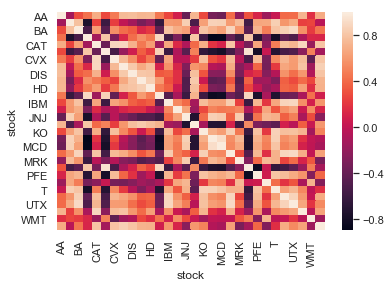

In [30]:
sns.heatmap(corr_data)